# Introduction
Topic Modeling is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Topic Models are very useful for multiple purposes, including:

1. Document clustering
2. Organizing large blocks of textual data
3. Information retrieval from unstructured text
4. Feature selection

### Imports
Import libraries and write settings here.

In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import re


import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim


# Analysis

## Load the zomato reviews data 

We will load the cleaned data 

In [8]:
data=pd.read_csv("Cleaned_Reviews_V2.csv",encoding='utf-8')
data.head()

,index,rating,review_text,cleaned_review,rating_category,cleaned_noun_adj_review
0,0,4.0,A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.,beautiful place dine in the interior mughal era lighting perfect we go occasion christmas limit item available taste service compromise all the complaint bread better would surely like come,positive,beautiful place in.the interiors mughal era lightings perfect.we occasion christmas items available taste service only complaint breads
1,1,4.0,Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.,dinner family turn good choose suitable age people try place like starter service good price affordable recommend restaurant early dinner place little noisy,positive,dinner family good choose suitable ages people place starters service good prices affordable restaurant early dinner place little noisy
2,2,3.0,Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..,ambience good pocket friendly cafe quantity good dessert good,neutral,ambience good pocket friendly cafe quantity good desserts good
3,3,4.0,Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............,great food proper karnataka style meal twice fully satisfied star manage,positive,great food proper karnataka style full meals satisfied stars
4,4,4.0,Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha / Kulcha making,good restaurant neighbourhood buffet system properly arrange variety dish garba dance puppet good spread dessert live paratha kulcha making,positive,good restaurant neighbourhood buffet system variety dishes garba dance puppet show good spread desserts paratha kulcha making


##  Creating the term dictionary of our corpus, where every unique term is assigned an index. 




In [18]:
data=data[~pd.isnull(data['cleaned_noun_adj_review'])]
data.shape
#dictionary = corpora.Dictionary(data['cleaned_noun_adj_review'].tolist())

(42020, 6)

In [20]:
corpus=data['cleaned_noun_adj_review'].tolist()

In [21]:
corpus

['beautiful place in.the interiors mughal era lightings perfect.we occasion christmas items available taste service only complaint breads',
 'dinner family good choose suitable ages people place starters service good prices affordable restaurant early dinner place little noisy',
 'ambience good pocket friendly cafe quantity good desserts good',
 'great food proper karnataka style full meals satisfied stars',
 'good restaurant neighbourhood buffet system variety dishes garba dance puppet show good spread desserts paratha kulcha making',
 'food ambience service family lunch place buffets soups starters butter kadai panner veg kohlapuri pease pulav food good service slow mins order place apt family hangout cheers',
 'awesome food great staffsgood quality food complimentary breakfast honey lemon chicken chicken manchow soup perfect place alone family',
 'restaurant everything best affordable cost nice ambience music staff r awesome vodka panipuri unique thing pasta yummy occasion 1st choic

**To create term dictionary, we must have eah string tokenised**

In [22]:
tokenised_corpus=[]
for corp in corpus:
    
    tokenised_corpus.append([token for token in corp.split(" ")])
tokenised_corpus

[['beautiful',
  'place',
  'in.the',
  'interiors',
  'mughal',
  'era',
  'lightings',
  'perfect.we',
  'occasion',
  'christmas',
  'items',
  'available',
  'taste',
  'service',
  'only',
  'complaint',
  'breads'],
 ['dinner',
  'family',
  'good',
  'choose',
  'suitable',
  'ages',
  'people',
  'place',
  'starters',
  'service',
  'good',
  'prices',
  'affordable',
  'restaurant',
  'early',
  'dinner',
  'place',
  'little',
  'noisy'],
 ['ambience',
  'good',
  'pocket',
  'friendly',
  'cafe',
  'quantity',
  'good',
  'desserts',
  'good'],
 ['great',
  'food',
  'proper',
  'karnataka',
  'style',
  'full',
  'meals',
  'satisfied',
  'stars'],
 ['good',
  'restaurant',
  'neighbourhood',
  'buffet',
  'system',
  'variety',
  'dishes',
  'garba',
  'dance',
  'puppet',
  'show',
  'good',
  'spread',
  'desserts',
  'paratha',
  'kulcha',
  'making'],
 ['food',
  'ambience',
  'service',
  'family',
  'lunch',
  'place',
  'buffets',
  'soups',
  'starters',
  'butter

In [30]:
dictionary = corpora.Dictionary(tokenised_corpus)

In [33]:
len(dictionary)

12069

In [78]:
dictionary[10] #word available has index 0

'mughal'

In [36]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenised_corpus]

In [39]:
doc_term_matrix[1] ##(14,2) => word place has occurred twice

[(14, 2),
 (15, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1)]

In [40]:
dictionary[14]

'place'

## Creating the object for LDA model using gensim library


In [45]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)


In [46]:
lda_model.print_topics()

[(0,
  '0.034*"chicken" + 0.017*"food" + 0.015*"place" + 0.012*"pasta" + 0.011*"good" + 0.009*"amazing" + 0.009*"pizza" + 0.009*"great" + 0.008*"best" + 0.008*"rice"'),
 (1,
  '0.033*"food" + 0.030*"place" + 0.021*"beer" + 0.019*"good" + 0.017*"service" + 0.012*"time" + 0.012*"bad" + 0.008*"other" + 0.008*"ambience" + 0.008*"night"'),
 (2,
  '0.039*"good" + 0.033*"starters" + 0.032*"veg" + 0.030*"buffet" + 0.023*"main" + 0.021*"course" + 0.014*"food" + 0.014*"non" + 0.013*"place" + 0.012*"chicken"'),
 (3,
  '0.063*"food" + 0.062*"good" + 0.057*"place" + 0.030*"service" + 0.024*"great" + 0.024*"ambience" + 0.016*"nice" + 0.015*"staff" + 0.011*"ambiance" + 0.011*"buffet"')]

## Visualise Topics

In [47]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.102395 -0.053219  1       1        31.009632
2      0.094290 -0.193783  2       1        24.987980
0      0.202538  0.153280  3       1        22.662498
1     -0.194433  0.093722  4       1        21.339884, topic_info=      Category          Freq          Term         Total  loglift  logprob
29     Default  9102.000000   starters      9102.000000   30.0000  30.0000
74     Default  8968.000000   veg           8968.000000   29.0000  29.0000
46     Default  12199.000000  buffet        12199.000000  28.0000  28.0000
121    Default  6453.000000   main          6453.000000   27.0000  27.0000
110    Default  5992.000000   course        5992.000000   26.0000  26.0000
78     Default  12887.000000  chicken       12887.000000  25.0000  25.0000
1383   Default  5096.000000   beer          5096.000000   24.0000  24.0000
144    Default  3844.000000   non           3844.000000   23.0000  23.0000
37     Default  37901.000000  food          37901.000000  22.0000  22.0000
23     Default  39606.000000  good          39606.000000  21.0000  21.0000
14     Default  34239.000000  place         34239.000000  20.0000  20.0000
771    Default  2810.000000   bad           2810.000000   19.0000  19.0000
99     Default  3691.000000   pasta         3691.000000   18.0000  18.0000
66     Default  5920.000000   lunch         5920.000000   17.0000  17.0000
696    Default  4156.000000   pizza         4156.000000   16.0000  16.0000
85     Default  3942.000000   soup          3942.000000   15.0000  15.0000
445    Default  3908.000000   fish          3908.000000   14.0000  14.0000
1788   Default  1952.000000   garlic        1952.000000   13.0000  13.0000
807    Default  2083.000000   sauce         2083.000000   12.0000  12.0000
534    Default  3643.000000   floor         3643.000000   11.0000  11.0000
132    Default  3185.000000   rice          3185.000000   10.0000  10.0000
33     Default  3916.000000   desserts      3916.000000   9.0000   9.0000 
579    Default  2676.000000   night         2676.000000   8.0000   8.0000 
107    Default  6412.000000   amazing       6412.000000   7.0000   7.0000 
453    Default  1560.000000   pitcher       1560.000000   6.0000   6.0000 
460    Default  1728.000000   -             1728.000000   5.0000   5.0000 
56     Default  2544.000000   spread        2544.000000   4.0000   4.0000 
15     Default  18552.000000  service       18552.000000  3.0000   3.0000 
1319   Default  1883.000000   biriyani      1883.000000   2.0000   2.0000 
263    Default  2446.000000   paneer        2446.000000   1.0000   1.0000 
47     Topic1   1103.271484   dance         1104.126831   1.1701  -5.7497 
77     Topic1   1006.242432   breakfast     1007.088074   1.1700  -5.8418 
63     Topic1   1006.375244   hangout       1007.234497   1.1700  -5.8417 
673    Topic1   742.265381    roof          743.113831    1.1697  -6.1461 
983    Topic1   709.820251    loud          710.707703    1.1696  -6.1908 
494    Topic1   751.461243    room          752.426575    1.1696  -6.1338 
489    Topic1   591.075623    parties       591.904846    1.1695  -6.3738 
479    Topic1   614.558594    ideal         615.435730    1.1694  -6.3349 
1405   Topic1   534.233459    dj            535.086548    1.1693  -6.4750 
2483   Topic1   472.603760    memorable     473.482605    1.1690  -6.5975 
1407   Topic1   379.300385    ground        380.159302    1.1686  -6.8175 
2616   Topic1   350.404938    midnight      351.245850    1.1685  -6.8967 
3950   Topic1   483.939911    property      485.115509    1.1684  -6.5738 
11     Topic1   345.261871    occasion      346.123962    1.1684  -6.9115 
1683   Topic1   458.903168    low           460.064240    1.1683  -6.6269 
510    Topic1   346.999634    rates         347.881531    1.1683  -6.9065 
1977   Topic1   313.496704    peaceful      314.342285    1.1682  -7.0080 
2055   Topic1   319.912720    int

In [56]:
lda_model[doc_term_matrix[1]] #Gets the topic distribution of first document

[(0, 0.0135562485), (1, 0.24974638), (2, 0.10157402), (3, 0.6351233)]

Topic 3 is dominant here. Let us see how to get key words for this topic num

In [57]:
lda_model.show_topic(3)

[('food', 0.062925205),
 ('good', 0.061610546),
 ('place', 0.057259038),
 ('service', 0.02962669),
 ('great', 0.024301277),
 ('ambience', 0.023713734),
 ('nice', 0.0160455),
 ('staff', 0.014733222),
 ('ambiance', 0.011194835),
 ('buffet', 0.010968639)]

This is a list of tuple, with word and its score. We can extract the topic words from here. Let us use this to get dominant topic is each reviews

In [50]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.4305,"food, good, place, service, great, ambience, nice, staff, ambiance, buffet",beautiful place in.the interiors mughal era lightings perfect.we occasion christmas items available taste service only complaint breads
1,1,3.0,0.6351,"food, good, place, service, great, ambience, nice, staff, ambiance, buffet",dinner family good choose suitable ages people place starters service good prices affordable restaurant early dinner place little noisy
2,2,3.0,0.9212,"food, good, place, service, great, ambience, nice, staff, ambiance, buffet",ambience good pocket friendly cafe quantity good desserts good
3,3,1.0,0.5202,"food, place, beer, good, service, time, bad, other, ambience, night",great food proper karnataka style full meals satisfied stars
4,4,2.0,0.7187,"good, starters, veg, buffet, main, course, food, non, place, chicken",good restaurant neighbourhood buffet system variety dishes garba dance puppet show good spread desserts paratha kulcha making
5,5,2.0,0.4602,"good, starters, veg, buffet, main, course, food, non, place, chicken",food ambience service family lunch place buffets soups starters butter kadai panner veg kohlapuri pease pulav food good service slow mins order place apt family hangout cheers
6,6,0.0,0.5124,"chicken, food, place, pasta, good, amazing, pizza, great, best, rice",awesome food great staffsgood quality food complimentary breakfast honey lemon chicken chicken manchow soup perfect place alone family
7,7,3.0,0.5840,"food, good, place, service, great, ambience, nice, staff, ambiance, buffet",restaurant everything best affordable cost nice ambience music staff r awesome vodka panipuri unique thing pasta yummy occasion 1st choice mine kids buffet more times ds place
8,8,0.0,0.4760,"chicken, food, place, pasta, good, amazing, pizza, great, best, rice",place pleasant ambiance courteous staff amazing food quality food portions more enough fattoush salad tangy dressing starters mutton kebab soft juicy succulent muttons hummus mayo main course kashmiri pulao okay rice sweet apples pomegranate kernels pineapples course something spicy chicken tikka masala half food ambiance service
9,9,3.0,0.6900,"food, good, place, service, great, ambience, nice, staff, ambiance, buffet",buffet lunch empire restaurant great food awesome everyone non veg budget food service ambience


In [58]:
lda_model.log_perplexity(doc_term_matrix) #Perplexoity, lower the better

-6.849348234051029

In [65]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenised_corpus, dictionary=dictionary,coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40655604182138516


### Identifyin the best number of topics - using Coherence Score

In [74]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=100,chunksize=1000, passes=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenised_corpus, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(coherencemodel.get_coherence())

    return model_list, coherence_values

In [75]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenised_corpus, start=2, limit=10, step=2)




0.35715683852022084
0.40655604182138516
0.3997456875682773
0.415946577481574


Text(0.5,0,'Num Topics')

Text(0,0.5,'Coherence score')

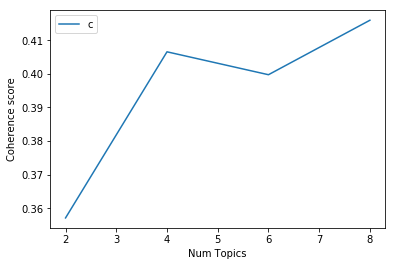

In [76]:

limit=10
start=2
step=2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [77]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv)

Num Topics = 2  has Coherence Value of 0.35715683852022084
Num Topics = 4  has Coherence Value of 0.40655604182138516
Num Topics = 6  has Coherence Value of 0.3997456875682773
Num Topics = 8  has Coherence Value of 0.415946577481574
